In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter

import geopandas as gpd
import shapely.geometry
import rasterio
import json
import geopandas as gpd
import geopandas_osm.osm
from descartes import PolygonPatch
import gdal

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [2]:
#!ls /home/ubuntu/data/TX_pre/

# load a large-scale image

In [3]:
path_to_harvey_images_post = '/home/ubuntu/data/TX_post/'
path_to_harvey_images_pre  = '/home/ubuntu/data/TX_pre/'

In [4]:
# Get a list of all of the tif files, pre and post harvey
tif_files_a = [os.path.join(path_to_harvey_images_post, fn) for fn in os.listdir(path_to_harvey_images_post) if fn.endswith('tif')]
tif_files_b = [os.path.join(path_to_harvey_images_pre,  fn) for fn in os.listdir(path_to_harvey_images_pre)  if fn.endswith('tif')]

In [16]:
overlap_files = []
short_tif_a = [x[-11:] for x in tif_files_a]
short_tif_b = [x[-11:] for x in tif_files_b]
for footprint in short_tif_a:
    if footprint in short_tif_b: overlap_files.append(footprint)
print(overlap_files)

['3020333.tif', '3020133.tif', '3002220.tif', '3020201.tif', '3020210.tif', '3020330.tif', '3020223.tif', '3002233.tif', '3020103.tif', '3020323.tif', '3020030.tif', '3020010.tif', '2113333.tif', '3020231.tif', '3002303.tif', '3020120.tif', '3020313.tif', '3020102.tif', '3002232.tif', '3020320.tif', '3020303.tif', '3020111.tif', '3020101.tif', '3020121.tif', '3020013.tif', '3020123.tif', '3002222.tif', '3020301.tif', '3002321.tif', '3020302.tif', '3020220.tif', '3020312.tif', '2131311.tif', '3002331.tif', '3020331.tif', '3020112.tif', '2131333.tif', '3002213.tif', '3020233.tif', '2131331.tif', '3002333.tif', '3020122.tif', '3020032.tif', '3020012.tif', '3020300.tif', '3020230.tif', '3020011.tif', '3002230.tif', '3020200.tif', '3020202.tif', '2131113.tif', '3020113.tif', '3020213.tif', '3002221.tif', '2131313.tif', '3020100.tif', '3020031.tif', '3020001.tif', '3002323.tif', '3020023.tif', '3020021.tif', '2131131.tif', '3002223.tif', '3020232.tif', '3020222.tif', '3002312.tif', '3020003.

In [ ]:
#this is a BIG job, and will write ~180Gb of tiles.  I have it commented out so
#it will note be run accidentally
"""for input_filename in overlap_files:
    
    print("working on :",input_filename)
    #tile post-hurricane image
    out_path = '/home/ubuntu/data/TX_post/Geo_Tiff_tiles/'
    in_path = path_to_harvey_images_post
    output_filename = input_filename[:7]+'_a_tile_'
            
    tile_size_x = 512
    tile_size_y = 512

    ds = gdal.Open(in_path + input_filename)
    band = ds.GetRasterBand(1)
    xsize = band.XSize
    ysize = band.YSize

    for i in range(0, xsize, tile_size_x):
        for j in range(0, ysize, tile_size_y):
            com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
            os.system(com_string)
    
    #repeat tile for pre-hurricane image
    out_path = '/home/ubuntu/data/TX_pre/Geo_Tiff_tiles/'
    in_path = path_to_harvey_images_pre
    output_filename = input_filename[:7]+'_b_tile_'

    tile_size_x = 512
    tile_size_y = 512

    ds = gdal.Open(in_path + input_filename)
    band = ds.GetRasterBand(1)
    xsize = band.XSize
    ysize = band.YSize

    for i in range(0, xsize, tile_size_x):
        for j in range(0, ysize, tile_size_y):
            com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
            os.system(com_string)
print("tiling complete!!")"""

In [6]:
#src = rasterio.open(data_folder_pre+filename)

In [7]:
src.crs

CRS({'init': u'epsg:4326'})

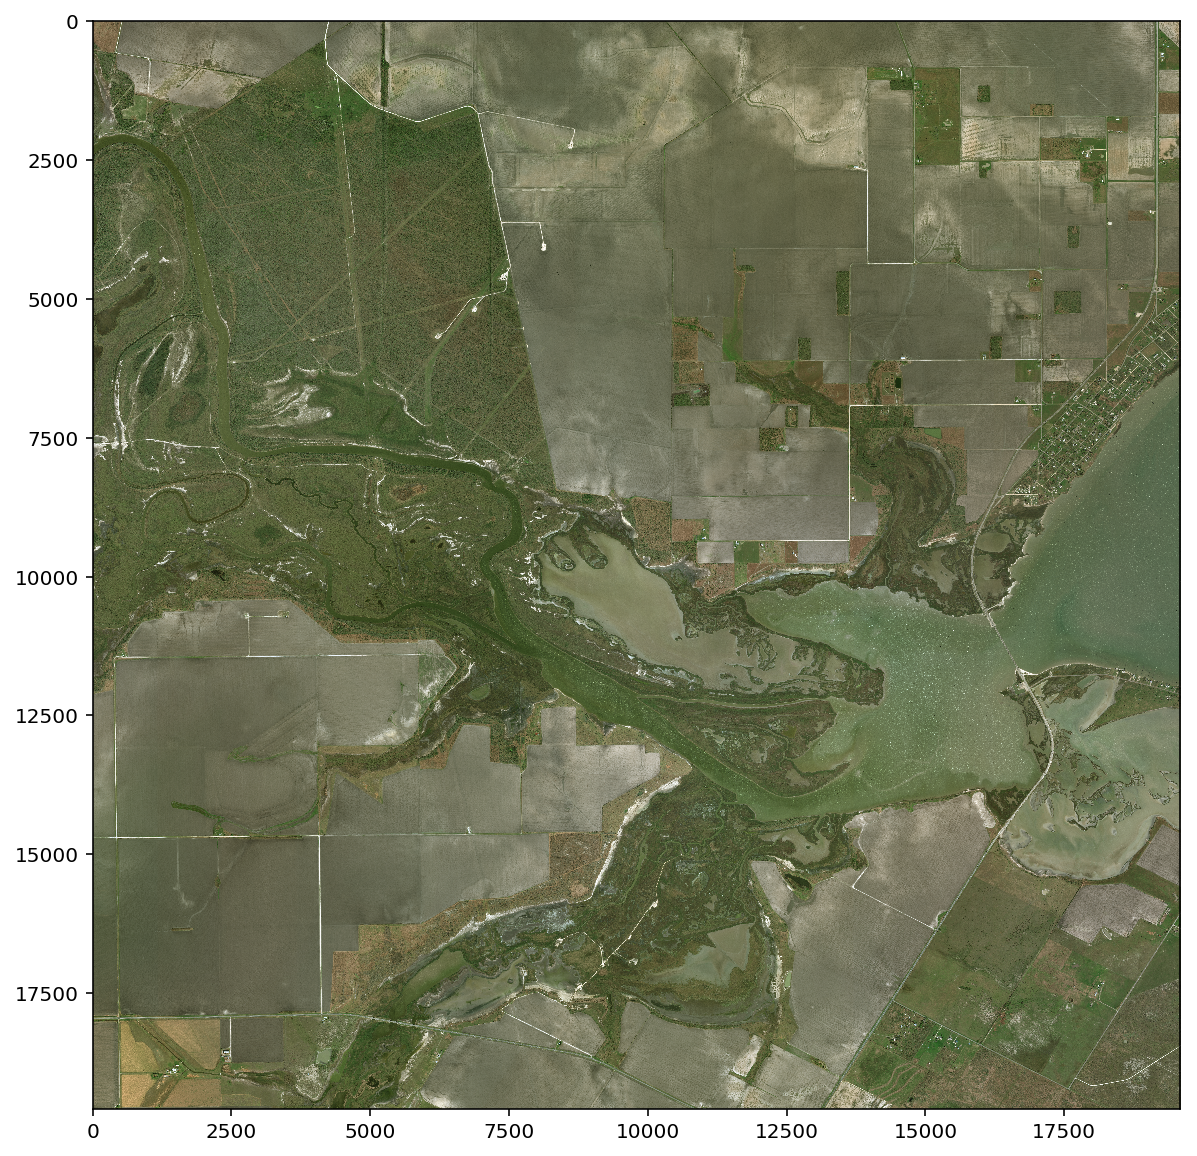

In [8]:
# Load the RGB bands and transpose the image shape
#img = src.read([5, 3, 2]).transpose([1,2,0])
img = src.read([1, 2, 3]).transpose([1,2,0])
# Plot it
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(img);

In [9]:
img.mean(),img.max(),img.min(),img.std()

(96.541888569312789, 255, 1, 28.093873389026943)

## break the image into more manageable pieces

In [7]:
files = !ls /home/ubuntu/data/TX_pre/
len(files)


1521

In [16]:
file = files[223] 
print(file)
src = rasterio.open('/home/ubuntu/data/TX_pre/output_folder_0/'+file)

#is the file empty (all zeros)?
src.read().sum() == 0

tile_11776_5120.tif


False